<a href="https://colab.research.google.com/github/AI-KPI/ml_intro/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [9]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

$$
\newcommand\norm[1]{\left\lVert#1\right\rVert} 
\DeclareMathOperator{\Tr}{Tr}
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    Цей матеріал є частиною серії 2 глави про лінійну алгебру з [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). Він спрямований на надання інформації, ілюстрацій та коду на мові python, про математичні теорії і побудований на моєму розуміння цих понять. Ви можете перевірити навчальний план у [introduction post(вступній публікації)] (https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Вступ

Цей розділ також дуже легкий! Ми побачимо, що означає детермінанта матриці. Цей спеціальний номер може розповісти нам багато чого про нашу матрицю!

# 2.11 Визначник

Ми вже бачили [2.8](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/) що матрицю можна розглядати як лінійне перетворення простору. Визначник матриці $\bs{A}$ - це число, що відповідає 'мультиплікативній зміні', яку ви отримуєте, коли перетворюєте свій простір за допомогою цієї матриці(двитись коментар Pete L. Clark в [питання про SE](https://math.stackexchange.com/questions/668/whats-an-intuitive-way-to-think-about-the-determinant)). Негативний детермінант означає, що відбувається зміна орієнтації (а не лише масштабування та / або обертання). Як зазначив Nykamp DQ у [Math Insight](https://mathinsight.org/determinant_linear_transformation), зміна орієнтації означає, наприклад, у 2D, що ми беремо площину з цих 2-х вимірів, робимо деякі перетворення і повертаємось до початкового 2D-простору. Ось приклад розмежування позитивної та негативної детермінанти:

<img src="images/positive-negative-determinant.png" width="400" alt="Порівняння ефекту позитивних та негативних детермінант" title="Comparison of positive and negative determinant">
<em>Визначник матриці може розповісти вам багато речей про перетворення, пов'язані з цією матрицею</em>

Ви бачите, що друге перетворення неможливо отримати за допомогою обертання та масштабування. Цей знак може розповісти вам про характер перетворення, пов'язаного з матрицею!

Крім того, детермінант також дає вам 'кількість' трансформації. Якщо взяти 'n' -вимірний одиничний куб і застосувати матрицю $\bs{A}$ на ньому абсолютне значення визначника відповідає площі перетвореної фігури. Ви можете повірити мені легше після наступного прикладу.

### Приклад 1.

Для обчислення площі фігур ми будемо використовувати прості квадрати в 2 вимірах. Одиничну квадратну площу можна обчислити за допомогою теореми Піфагора, взявши два одиничні вектори.

<img src="images/unit-square-area.png" width="300" alt="Ілюстрація одиничної квадратної площі та одиничних векторів у двох вимірах" title="The unit square area">
<em>Одиниця квадратної площі</em>

Довжини $i$ і $j$ становлять $1$, отже площа одиничної площі становить $1$.

Почнемо зі створення обох векторів у Python:

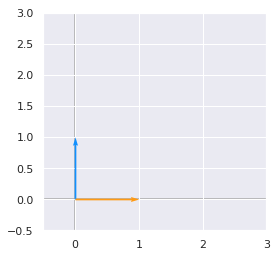

In [10]:
orange = '#FF9A13'
blue = '#1190FF'
    
i = [0, 1]
j = [1, 0]

plotVectors([i, j], [[blue], [orange]])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

Ми застосуємо

$$
\bs{A}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

до $i$ і $j$. Ви можете помітити, що ця матриця особлива: вона діагональна. Тож це лише масштабуватиме наш простір. Тут немає обертання. Точніше, він буде масштабувати кожен вимір однаково, оскільки діагональні значення ідентичні. Створимо матрицю $\bs{A}$:

In [11]:
A = np.array([[2, 0], [0, 2]])
A

array([[2, 0],
       [0, 2]])

Зараз ми застосуємо $\bs{A}$ на наших двох одиничних векторах $i$ і $j$ і побудуємо графік отриманих нових векторів:

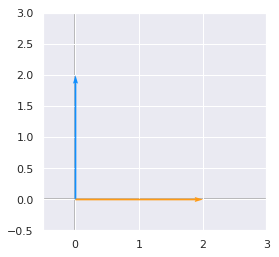

In [12]:
new_i = A.dot(i)
new_j = A.dot(j)
plotVectors([new_i, new_j], [['#1190FF'], ['#FF9A13']])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

Як і очікувалося, ми можемо бачити, що квадрат, що відповідає $i$ і $j$ не обертався, але довжина $i$ і $j$ подвоїлася. Тепер ми обчислимо визначник $\bs{A}$ (Моежете переглянути [Статтю Вікіпедії](https://en.wikipedia.org/wiki/Determinant) докладніше про обчислення визначника):

<img src="images/unit-square-area-transformed.png" width="300" alt="Площі одиничного квадрата та його перетворення матрицею" title="The transformed unit square">
<em>Одиничний квадрат, перетворений матрицею</em>

In [13]:
np.linalg.det(A)

4.0

І так, перетворення помножило площу одиничного квадрата на 4. Довжини $new_i$ і $new_j$ дорівнюють $2$ (thus $2\cdot2=4$).

### Приклад 2.

Побачимо тепер приклад негативного детермінанта.

Ми перетворимо одиничний квадрат за допомогою матриці:

$$
\bs{B}=\begin{bmatrix}
    -2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

Його визначником є $-4$:

In [14]:
B = np.array([[-2, 0], [0, 2]])
np.linalg.det(B)

-4.0

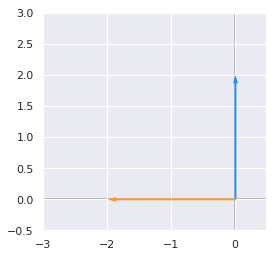

In [15]:
new_i_1 = B.dot(i)
new_j_1 = B.dot(j)
plotVectors([new_i_1, new_j_1], [['#1190FF'], ['#FF9A13']])
plt.xlim(-3, 0.5)
plt.ylim(-0.5, 3)
plt.show()

Ми бачимо, що матриці з визначником $2$ і $-2$ модифікували площу одиничного квадрата однаково.

<img src="images/unit-square-area-transformed-1.png" width="300" alt="Площі одиничного квадрата та його перетворення матрицею з негативним визначником" title="The transformed unit square">
<em>Одиничний квадрат, перетворений матрицею з від’ємним визначником</em>

Абсолютне значення визначника показує, що, як і в першому прикладі, площа нового квадрата в 4 рази перевищує площу одиничного квадрата. Але цього разу це було не просто масштабування, а й трансформація. Це не очевидно лише з одиничними векторами, тому давайте перетворимо деякі випадкові точки. Ми будемо використовувати матрицю

$$
\bs{C}=\begin{bmatrix}
    -1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

що має детермінант, рівний $-1$ для простоти:

In [16]:
# Some random points
points = np.array([[1, 3], [2, 2], [3, 1], [4, 7], [5, 4]])

In [17]:
C = np.array([[-1, 0], [0, 1]])
np.linalg.det(C)

-1.0

Оскільки визначник - $-1$, площа простору не буде змінена. Однак, оскільки воно є негативним, ми спостерігатимемо перетворення, яке ми не можемо отримати за допомогою обертання:

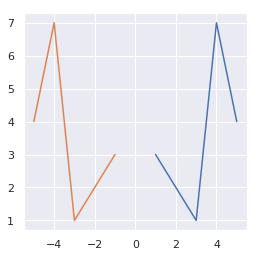

In [18]:
newPoints = points.dot(C)

plt.figure()
plt.plot(points[:, 0], points[:, 1])
plt.plot(newPoints[:, 0], newPoints[:, 1])
plt.show()

Ви можете побачити, що перетворення відображало початкову форму.

# Висновок

Ми бачили, що детермінанта матриці - це особливе значення, яке говорить нам багато речей про перетворення, що відповідають цій матриці. Тепер перейдіть до 'останнього розділу' Аналізу основних компонентів (PCA).

<span class='notes'>
 Не соромтеся писати мені електронний лист чи коментар. Програму цієї серії можна знайти [in the introduction post(у вступній статті)](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). Всі зошити можна знайти на [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>

# Список літератури

## Лінійні перетворення

- [Nykamp DQ, “Determinants and linear transformations.”(“Визначники та лінійні перетворення”) From Math Insight](https://mathinsight.org/determinant_linear_transformation)

- [Determinant intuition - SE( Інуїція визначника - SE)](https://math.stackexchange.com/questions/668/whats-an-intuitive-way-to-think-about-the-determinant)

## Numpy

- [Numpy визначник](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.det.html)

Переклад: Вовчок Євген, студент ІО-02мп, 2020 рік

